# Exploratory Data Analysis (EDA) report

## 1. Report overview

### 1.1. Project Title: 	**Lisbon Airbnb analysis, december 2023**

![Lisboa menina e moça](https://images.resosys.com/destinations/10/articles/getting-around_en/inline/1666700246-svetlana-gumerova-golcaouc7ia-unsplash.jpg)

### 1.2. Context:

Airbnb is an online marketplace for people to rent places to stay all over the world.

Lisbon is the capital city of Portugal, located in Europe. Situated along the Atlantic coast, Lisbon offers a rich maritime heritage and a mild Mediterranean climate, making it an attractive destination for travelers worldwide, and, consequently, for real state investors.

As a real state investor, I am interested in acquiring a property in Lisbon. I want to know in which Lisbon area I should invest.


### 1.3. Goal:

In this EDA we are going to focus on 1 single question:

1 - Where should I invest based on price, i.e., where are the prices higher?


### 1.4. Dataset used:

http://insideairbnb.com/get-the-data/     Lisbon, Portugal, December 2023

listings.csv.gz - 	Detailed Listings data


## 2. Data Overview

### 2.1. Import libraries


In [123]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import numpy as np

### 2.2 Load data

In [174]:
listings = pd.read_csv('./data/listings.csv.gz')
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20231217045130,2023-12-17,city scrape,Rental unit in Lisbon · ★4.49 · 1 bedroom · 3 ...,NaN,"To get to the city center, tram 15 stops in f...",https://a0.muscache.com/pictures/6422ee92-c84e...,14455,...,4.94,4.80,4.39,NaN,t,1,1,0,0,0.56
1,199461,https://www.airbnb.com/rooms/199461,20231217045130,2023-12-18,city scrape,Rental unit in Lisboa · ★4.92 · 2 bedrooms · 3...,NaN,"The BAIXA (down town, lower area) neighbourhoo...",https://a0.muscache.com/pictures/prohost-api/H...,914126,...,4.93,4.97,4.87,114187/AL,f,16,16,0,0,1.34
2,25659,https://www.airbnb.com/rooms/25659,20231217045130,2023-12-18,city scrape,Rental unit in Lisboa · ★4.82 · 1 bedroom · 1 ...,NaN,"The Alfama neighborhood, is the oldest and mos...",https://a0.muscache.com/pictures/miso/Hosting-...,107347,...,4.95,4.88,4.82,56539/AL.,t,1,1,0,0,1.69
3,29248,https://www.airbnb.com/rooms/29248,20231217045130,2023-12-17,city scrape,Rental unit in Lisbon · ★4.57 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/4212cc65-2046...,125768,...,4.75,4.83,4.61,23535/AL,t,5,5,0,0,2.36
4,208683,https://www.airbnb.com/rooms/208683,20231217045130,2023-12-18,city scrape,Rental unit in Lisbon · ★4.68 · 2 bedrooms · 2...,NaN,O bairro de Alfama é um dos bairros mais antig...,https://a0.muscache.com/pictures/21533977/a19d...,753902,...,4.87,4.90,4.66,35037/AL,t,6,6,0,0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,1045316044871166129,https://www.airbnb.com/rooms/1045316044871166129,20231217045130,2023-12-18,city scrape,Rental unit in Lisboa · ★New · 2 bedrooms · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,207402423,...,NaN,NaN,NaN,132237/AL,t,4,4,0,0,NaN
22747,1045433384003538979,https://www.airbnb.com/rooms/1045433384003538979,20231217045130,2023-12-18,city scrape,Rental unit in Lisboa · ★New · 2 bedrooms · 3 ...,NaN,Apartment is located in one of the most touris...,https://a0.muscache.com/pictures/miso/Hosting-...,62521369,...,NaN,NaN,NaN,60544/AL,t,24,24,0,0,NaN
22748,1045443962999171278,https://www.airbnb.com/rooms/1045443962999171278,20231217045130,2023-12-17,city scrape,Rental unit in Lisboa · ★New · 1 bedroom · 1 b...,NaN,"Marquês de Pombal Square, often simply referre...",https://a0.muscache.com/pictures/prohost-api/H...,1756107,...,NaN,NaN,NaN,Exempt,t,132,129,3,0,NaN
22749,1045468693077800153,https://www.airbnb.com/rooms/1045468693077800153,20231217045130,2023-12-17,city scrape,Tent in Lisboa · ★New · 2 bedrooms · 3 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,494418680,...,NaN,NaN,NaN,768,t,2,2,0,0,NaN


### 2.3. Get to know the data

In [125]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20231217045130,2023-12-17,city scrape,Rental unit in Lisbon · ★4.49 · 1 bedroom · 3 ...,NaN,"To get to the city center, tram 15 stops in f...",https://a0.muscache.com/pictures/6422ee92-c84e...,14455,...,4.94,4.80,4.39,NaN,t,1,1,0,0,0.56
1,199461,https://www.airbnb.com/rooms/199461,20231217045130,2023-12-18,city scrape,Rental unit in Lisboa · ★4.92 · 2 bedrooms · 3...,NaN,"The BAIXA (down town, lower area) neighbourhoo...",https://a0.muscache.com/pictures/prohost-api/H...,914126,...,4.93,4.97,4.87,114187/AL,f,16,16,0,0,1.34
2,25659,https://www.airbnb.com/rooms/25659,20231217045130,2023-12-18,city scrape,Rental unit in Lisboa · ★4.82 · 1 bedroom · 1 ...,NaN,"The Alfama neighborhood, is the oldest and mos...",https://a0.muscache.com/pictures/miso/Hosting-...,107347,...,4.95,4.88,4.82,56539/AL.,t,1,1,0,0,1.69
3,29248,https://www.airbnb.com/rooms/29248,20231217045130,2023-12-17,city scrape,Rental unit in Lisbon · ★4.57 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/4212cc65-2046...,125768,...,4.75,4.83,4.61,23535/AL,t,5,5,0,0,2.36
4,208683,https://www.airbnb.com/rooms/208683,20231217045130,2023-12-18,city scrape,Rental unit in Lisbon · ★4.68 · 2 bedrooms · 2...,NaN,O bairro de Alfama é um dos bairros mais antig...,https://a0.muscache.com/pictures/21533977/a19d...,753902,...,4.87,4.90,4.66,35037/AL,t,6,6,0,0,0.98


In [126]:
#size
listings.shape

(22751, 75)

In [127]:
#Columns:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [128]:
#Check type of columns and other info: - I used this method to see all columns. With dtypes, it only shows the 5 first and 5 last columns.
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22751 entries, 0 to 22750
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22751 non-null  int64  
 1   listing_url                                   22751 non-null  object 
 2   scrape_id                                     22751 non-null  int64  
 3   last_scraped                                  22751 non-null  object 
 4   source                                        22751 non-null  object 
 5   name                                          22751 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         13390 non-null  object 
 8   picture_url                                   22751 non-null  object 
 9   host_id                                       22751 non-null 

In [129]:
#Check price column:

listings['price']

0         $68.00
1        $199.00
2         $71.00
3        $105.00
4         $60.00
          ...   
22746     $76.00
22747    $122.00
22748     $78.00
22749     $63.00
22750     $69.00
Name: price, Length: 22751, dtype: object

In [130]:
# general info:
listings.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.275100e+04,2.275100e+04,0.0,2.275100e+04,22751.000000,22751.000000,22751.000000,22751.000000,22751.000000,0.0,...,19806.000000,19806.000000,19806.000000,19804.000000,19807.000000,22751.000000,22751.000000,22751.000000,22751.000000,19798.000000
mean,3.214074e+17,2.023122e+13,NaN,1.764003e+08,32.696189,45.252297,38.762083,-9.208175,3.866423,NaN,...,4.667565,4.754932,4.767732,4.693635,4.544575,18.719661,14.419762,4.098853,0.110984,1.522438
std,4.152084e+17,0.000000e+00,NaN,1.765189e+08,112.744673,233.508810,0.112169,0.112812,2.376913,NaN,...,0.436327,0.394468,0.388479,0.362483,0.462732,43.269288,40.598630,14.875688,0.871295,1.496262
min,6.499000e+03,2.023122e+13,NaN,1.405900e+04,1.000000,1.000000,38.676140,-9.488100,1.000000,NaN,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.092871e+07,2.023122e+13,NaN,2.120087e+07,2.000000,2.000000,38.711030,-9.291569,2.000000,NaN,...,4.570000,4.710000,4.710000,4.590000,4.430000,1.000000,1.000000,0.000000,0.000000,0.430000
50%,4.285647e+07,2.023122e+13,NaN,1.094943e+08,5.000000,6.000000,38.719080,-9.147670,4.000000,NaN,...,4.790000,4.870000,4.880000,4.790000,4.660000,4.000000,2.000000,0.000000,0.000000,1.065000
75%,7.837875e+17,2.023122e+13,NaN,3.032899e+08,17.000000,21.000000,38.747326,-9.134860,5.000000,NaN,...,4.930000,4.970000,4.980000,4.920000,4.800000,14.000000,9.000000,2.000000,0.000000,2.210000
max,1.047514e+18,2.023122e+13,NaN,5.509970e+08,2641.000000,8868.000000,39.303860,-8.838504,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,288.000000,282.000000,138.000000,18.000000,39.820000


In [131]:
#Count values per neighbourhood_group:
listings.value_counts("neighbourhood_group_cleansed")

neighbourhood_group_cleansed
Lisboa                   15611
Cascais                   2149
Sintra                    1537
Mafra                     1289
Lourinh                    481
Oeiras                     437
Torres Vedras              327
Loures                     281
Amadora                    234
Odivelas                   133
Alenquer                    87
Vila Franca De Xira         74
Cadaval                     59
Sobral De Monte Agrao       28
Azambuja                    14
Arruda Dos Vinhos           10
Name: count, dtype: int64

In [175]:
#Lisbon Map
#define coordinates based on min and max values of data: latitude = 38.676140, longitude = -9.488100	
lisbon_coords = [38.9, -9.139480277813723]

map = folium.Map(
    location = lisbon_coords,
    zoom_start=11, 
    tiles="OpenStreetMap",
)
map

In [176]:
#Lisbon Heat Map - quantity of properties
from folium.plugins import HeatMap

map.add_child(
    HeatMap(
        listings[['latitude','longitude']],
    )
)

In [177]:
#Count null values
# is null().sum() or null().any()

nan_columns = listings.columns[listings.isnull().any()]

nan_sum = listings[nan_columns].isnull().sum()

print(nan_sum)


description                    22751
neighborhood_overview           9361
host_location                   5957
host_about                      9862
host_response_time              3103
host_response_rate              3103
host_acceptance_rate            1813
host_is_superhost                182
host_neighbourhood             13387
neighbourhood                   9361
bathrooms                      22751
bathrooms_text                    28
bedrooms                       22745
beds                             213
price                           1161
calendar_updated               22751
has_availability                1161
first_review                    2953
last_review                     2953
review_scores_rating            2943
review_scores_accuracy          2945
review_scores_cleanliness       2945
review_scores_checkin           2945
review_scores_communication     2945
review_scores_location          2947
review_scores_value             2944
license                         1397
r

In [135]:
#Count duplicates

#get duplicated rows:
listings[listings.duplicated()]


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [136]:
#count duplicated rows:
listings.duplicated().sum()

0

### 2.3.1. Conclusion of this section:

- We have 75 columns and 22751 rows.

- With the heat map we see the in Lisbon district that the data is more concentraded around Lisbon center, in the south of the north bay and along the coast. For this study, only the city center will be included. The remaining rows won't taken into consideration.

- There are no duplicated rows.

- There are several columns with null values, including price. There are 1161 rows which price is null. These rows should be deleted from the dataset.

- There are columns with all values null. This rows should be deleted as well.

- Price is an object type. It should be set to float before ploting and analysing the data based on price.



## 3. Data Cleaning and Preparation

### 3.1. Delete NaN price

In [178]:
listings = listings.dropna(subset=['price'])
listings.shape

(21590, 75)

In [179]:
#1161 columns delete = Nan price colums

### 3.2. Delete colums with all values NaN

In [180]:
listings = listings.dropna(axis=1, how='all')

# 3 columns were deleted - we had 75, we have now 72
listings.shape

(21590, 72)

### 3.3. Delete rows where all elements are NaN

In [181]:
listings = listings.dropna(how='all')
#No rows to delete
listings.shape

(21590, 72)

### 3.4 Change price type to float

In [182]:
#remove $
listings['price'] = listings['price'].str.replace('$','')
listings['price']

0         68.00
1        199.00
2         71.00
3        105.00
4         60.00
          ...  
22746     76.00
22747    122.00
22748     78.00
22749     63.00
22750     69.00
Name: price, Length: 21590, dtype: object

In [167]:
listings['price'].unique()
#still have "weird" values, with 4 or more digits, we have ','.

array(['68.00', '199.00', '71.00', '105.00', '60.00', '70.00', '79.00',
       '78.00', '1,008.00', '130.00', '30.00', '40.00', '22.00', '57.00',
       '85.00', '75.00', '67.00', '400.00', '350.00', '110.00', '93.00',
       '275.00', '59.00', '50.00', '210.00', '164.00', '124.00', '55.00',
       '82.00', '175.00', '99.00', '51.00', '108.00', '134.00', '65.00',
       '87.00', '163.00', '109.00', '125.00', '360.00', '137.00', '81.00',
       '104.00', '256.00', '80.00', '159.00', '47.00', '291.00', '229.00',
       '120.00', '114.00', '121.00', '89.00', '66.00', '98.00', '154.00',
       '140.00', '195.00', '185.00', '97.00', '119.00', '100.00', '62.00',
       '180.00', '90.00', '86.00', '74.00', '465.00', '250.00', '72.00',
       '129.00', '200.00', '193.00', '77.00', '25.00', '49.00', '44.00',
       '243.00', '61.00', '118.00', '45.00', '24.00', '218.00', '211.00',
       '224.00', '101.00', '84.00', '56.00', '91.00', '214.00', '46.00',
       '246.00', '88.00', '122.00', '83.00

In [183]:
#remove ',' and convert to float
listings['price'] = listings['price'].str.replace(',', '').astype(float)
listings['price']


0         68.0
1        199.0
2         71.0
3        105.0
4         60.0
         ...  
22746     76.0
22747    122.0
22748     78.0
22749     63.0
22750     69.0
Name: price, Length: 21590, dtype: float64

### 3.5. Include only listings with neighbourhood_group_cleansed = Lisboa



In [184]:
listings = listings[listings['neighbourhood_group_cleansed'] == 'Lisboa']
listings['neighbourhood_group_cleansed'].unique()


array(['Lisboa'], dtype=object)

### 3.5.1. Change 'neighbourhood_cleansed' and 'neighbourhood_group_cleansed' types to string

In [185]:
#This is to avoid the "future error warning" it was given when changing wrong neigbourhoods names in the respective columns
listings['neighbourhood_group_cleansed'] = listings['neighbourhood_group_cleansed'].astype(str)
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].astype(str)

In [186]:
#reset index
listings.reset_index(drop=True, inplace=True)


## 4. Visualization

### 4.1. Neighbourhood in 'Lisboa' - city center


In [187]:
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Santa Maria Maior         3201
Misericrdia               2304
Arroios                   1926
Santo Antnio              1269
So Vicente                1138
Estrela                    895
Avenidas Novas             601
Penha de Frana             521
Campo de Ourique           330
Parque das Naes            295
Belm                       294
Areeiro                    288
Alcntara                   247
Alvalade                   242
Campolide                  239
Olivais                    221
Ajuda                      206
So Domingos de Benfica     155
Marvila                    127
Beato                      110
Lumiar                      96
Benfica                     71
Carnide                     34
Santa Clara                 26
Name: count, dtype: int64

In [189]:
# Correct the names of the neighbourhood

listings.loc[listings['neighbourhood_cleansed'] == 'Misericrdia', 'neighbourhood_cleansed'] = 'Misericórdia'
listings.loc[listings['neighbourhood_cleansed'] == 'Santo Antnio', 'neighbourhood_cleansed'] = 'Santo António'
listings.loc[listings['neighbourhood_cleansed'] == 'So Vicente', 'neighbourhood_cleansed'] = 'São Vicente'
listings.loc[listings['neighbourhood_cleansed'] == 'Parque das Naes', 'neighbourhood_cleansed'] = 'Parque das Nações'
listings.loc[listings['neighbourhood_cleansed'] == 'Belm', 'neighbourhood_cleansed'] = 'Belém'
listings.loc[listings['neighbourhood_cleansed'] == 'Alcntara', 'neighbourhood_cleansed'] = 'Alcântara'
listings.loc[listings['neighbourhood_cleansed'] == 'So Domingos de Benfica', 'neighbourhood_cleansed'] = 'São Domingos de Benfica'


#reset index
listings.reset_index(drop=True, inplace=True)
listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Santa Maria Maior          3201
Misericórdia               2304
Arroios                    1926
Santo António              1269
São Vicente                1138
Estrela                     895
Avenidas Novas              601
Penha de Frana              521
Campo de Ourique            330
Parque das Nações           295
Belém                       294
Areeiro                     288
Alcântara                   247
Alvalade                    242
Campolide                   239
Olivais                     221
Ajuda                       206
São Domingos de Benfica     155
Marvila                     127
Beato                       110
Lumiar                       96
Benfica                      71
Carnide                      34
Santa Clara                  26
Name: count, dtype: int64

### 4.1.1 Price and Quantity

<function matplotlib.pyplot.show(close=None, block=None)>

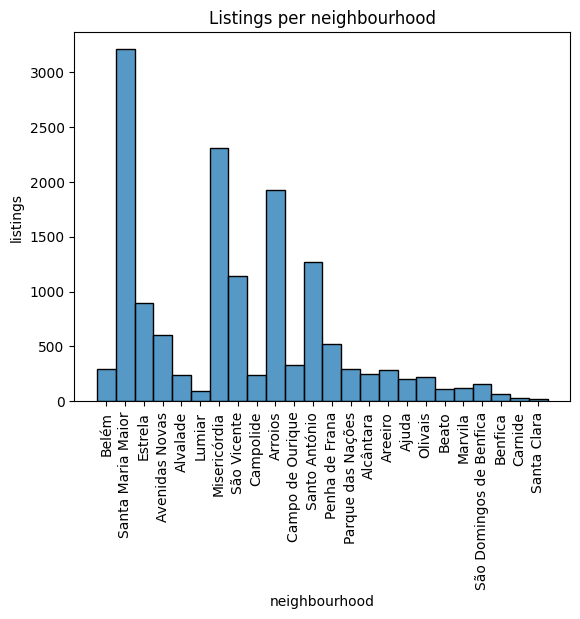

In [228]:
#Quantity of listings per neighbourhood
sns.histplot(listings, x="neighbourhood_cleansed")
plt.xticks(rotation=90)
plt.xlabel("neighbourhood")
plt.ylabel("listings")
plt.title("Listings per neighbourhood")
plt.show

,neighbourhood_cleansed,price
0,Ajuda,97.203883
1,Alcântara,89.611336
2,Alvalade,117.326446
3,Areeiro,90.729167
4,Arroios,113.913811
5,Avenidas Novas,115.377704
6,Beato,78.954545
7,Belém,108.772109
8,Benfica,99.169014
9,Campo de Ourique,132.621212


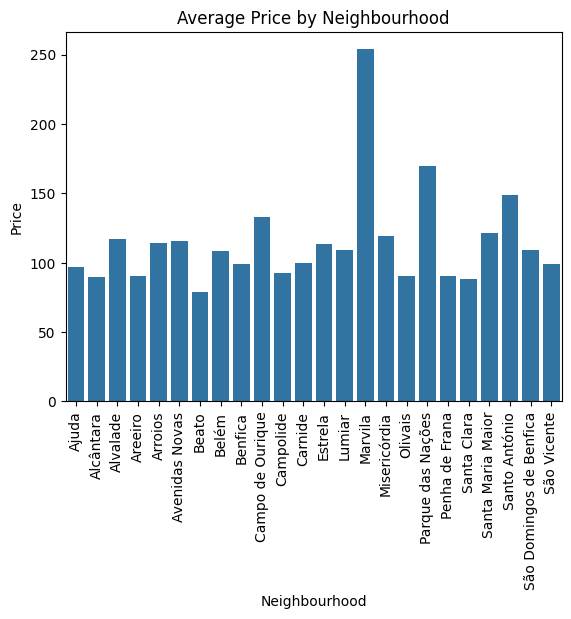

In [232]:
#Mean Price of listings per neighbourhood
mean_prices_by_neighbourhood = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
sns.barplot(mean_prices_by_neighbourhood,x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Average Price by Neighbourhood')
mean_prices_by_neighbourhood

#here, it was used a barplot, because the histogram is weird when showing the bars, they are not complete

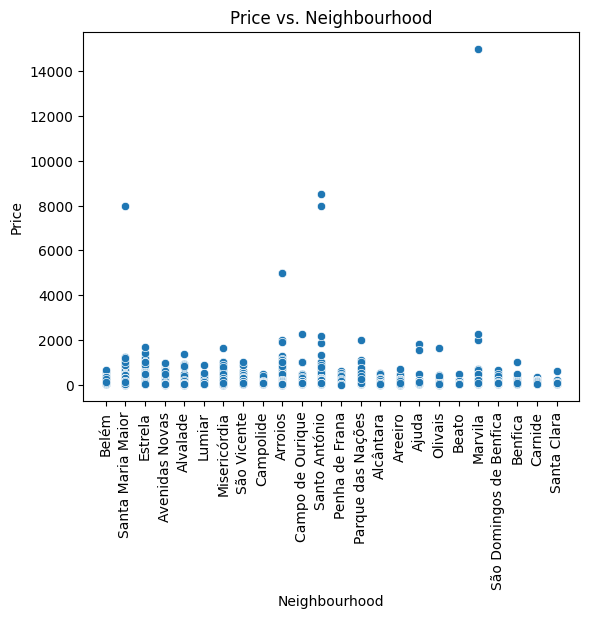

In [240]:
sns.scatterplot(listings, x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price vs. Neighbourhood')
plt.show()

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

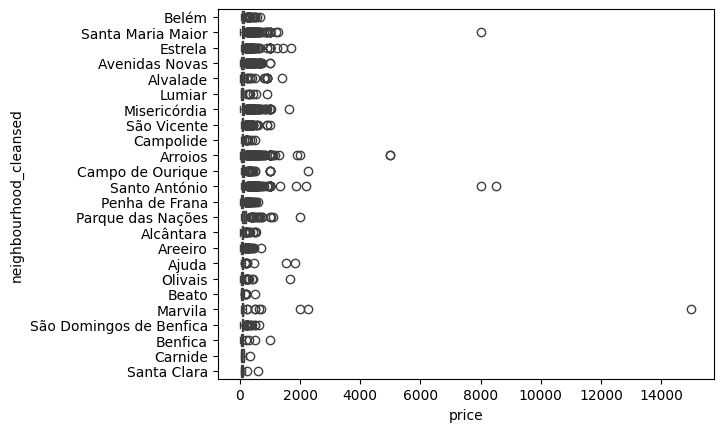

In [241]:
sns.boxplot(
    listings,
    x = "price",
    y ="neighbourhood_cleansed",
)

<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

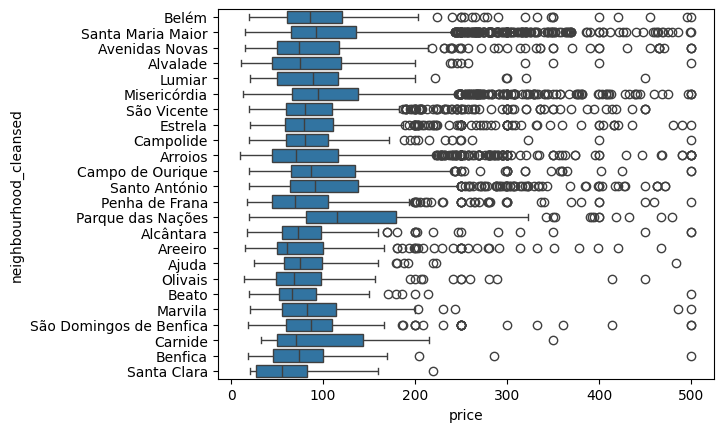

In [249]:
# Exclude rows whose price is bigger than 3000, to exclude outliers:

listings = listings[listings['price']<501]

sns.boxplot(
    listings,
    x = "price",
    y ="neighbourhood_cleansed",
)

,neighbourhood_cleansed,price
0,Ajuda,81.705882
1,Alcântara,87.768293
2,Alvalade,88.944444
3,Areeiro,88.606272
4,Arroios,92.041932
5,Avenidas Novas,98.715753
6,Beato,78.954545
7,Belém,105.277397
8,Benfica,86.300000
9,Campo de Ourique,112.700617


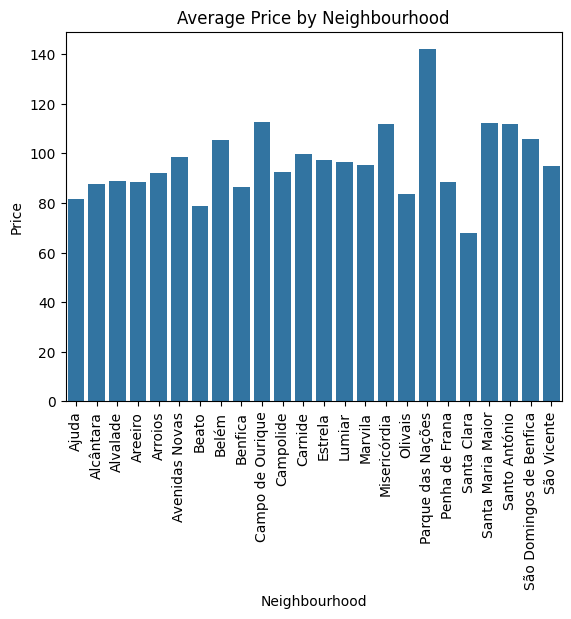

In [254]:
#If we redo now the mean prices per neigbourhood, we have different values.


#Mean Price of listings per neighbourhood
mean_prices_by_neighbourhood = listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
sns.barplot(mean_prices_by_neighbourhood,x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Average Price by Neighbourhood')
mean_prices_by_neighbourhood

## 5. Conclusions

According to the visualization section, we first saw that there are more properties listed in Santa Maria Maior, followed by Misericórdia and Arroios.
The Highest price average was in Marvila, where in fact, it is not one of the neighboorhoods with the most listed propeties. In fact this was a weird result, as Marvila is a dormitory city and not very turistic. It's mainly residential.
However there could be several facts for this area to be popular, like not being to far from Parque das Nações - a neighbourhood with the historical highest residential prices, a technical hub, place for the Web Summit and other events and inumerous turistic places.
After checking the scatter plot, it was possible to see that there were some listings influencing this results, as we saw some outliers with very expensive prices and far from the rest.
After cleaning the data again and removing the outliers, we see now that the properties with the highest prices are in Parque das Nações, which is in accordance with the current reality.

So, anwsering the question, where should I invest as a real state investor, based on higher prices: in Parque das Nações.



NOTE: please not this was a very short EDA due to the lack of time. A lot of time was spend in preparing and cleaning the data.
